# Modeling | US Inflation

# Table of Contents<a id='#home'></a>
* [5.0 Modeling](#data_m)
  * [5.1 Content](#content)
  * [5.2 Import Libs](#libs)
  * [5.3 File Imports](#files)
  * [5.4 Modeling](#modeling)
    * [5.4.1 Standard Scaler X & y (SS)](#ss_both)
    * [5.4.2 Standard Scaler X only (SS_y_uns)](#ss_y_un)
    * [5.4.3 Log Transformation X & y (LG)](#lg_both)
    * [5.4.4 Log Transformation X only (LG_y_uns)](#lg_y_un)
    * [5.4.5 Combination of Standard Scaler & Log Transformation for X only (SS_LG)](#combo)
  * [5.5 Initial Findings](#int_find)
  * [5.6 Modeling with the Most important Variables](#mod_imp)
    * [5.6.1 Standard Scaler X & y (SS_two)](#ss_imp)
    * [5.6.2 Standard Scaler 2 X only (SS_y_uns_two)](#ss_imp_uns)
    * [5.6.3 Log Transformation X & y (LG_two)](#lg_imp)
    * [5.6.4 Log Transformation X & y (LG_y_uns_two)](#ss_lg_imp)
    * [5.6.5 Combination of Standard Scaler & Log Transformation for X only (SS_LG_two)](#ss_lg_imp_n)
  * [5.7 Conclusion](#conclusion)


## 5.1 Content<a id='content'></a>

In this notebook, we will use models to gain insight into what explicitly drives `Inflation`. 

## 5.2 Libraries<a id='libs'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import os
import lxml
import datetime
import requests
import json
import collections
import seaborn as sns
from scipy import stats
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate

# may not need these but better to include
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression


## 5.3 File Imports<a id='files'></a>

In [2]:
cd

C:\Users\rands


In [4]:
# StandardScaler | X & y scaled
X_train_SS = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_train_SS.xlsx', index_col=None)
y_train_SS = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_train_SS.xlsx', index_col=None)
X_test_SS = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_test_SS.xlsx', index_col=None)
y_test_SS = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_test_SS.xlsx', index_col=None)

# Standard Scaler | X only scaled
X_train_SS_y_uns = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_train_SS_y_uns.xlsx', index_col=None)
y_train_SS_y_uns = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_train_SS_y_uns.xlsx', index_col=None)
X_test_SS_y_uns = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_test_SS_y_uns.xlsx', index_col=None)
y_test_SS_y_uns = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_test_SS_y_uns.xlsx', index_col=None)

# Log Scaler | X & y scaled
X_train_LG = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_train_LG.xlsx', index_col=None)
y_train_LG = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_train_LG.xlsx', index_col=None)
X_test_LG = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_test_LG.xlsx', index_col=None)
y_test_LG = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_test_LG.xlsx', index_col=None)

# Log Scaler | X only scaled
X_train_LG_y_uns = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_train_LG_y_uns.xlsx', index_col=None)
y_train_LG_y_uns = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_train_LG_y_uns.xlsx', index_col=None)
X_test_LG_y_uns = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_test_LG_y_uns.xlsx', index_col=None)
y_test_LG_y_uns = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_test_LG.xlsx', index_col=None)

# StandardScaler & Log Combined | X only scaled
X_tr_SS_LG = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_tr_SS_LG.xlsx', index_col=None)
y_tr_y_uns = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_tr_y_uns.xlsx', index_col=None)
X_te_SS_LG = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_te_SS_LG.xlsx', index_col=None)
y_te_y_uns = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_te_y_uns.xlsx', index_col=None)

print('Finished; proceed')

Finished; proceed


**Confirming the files were imported / saved correctly**; i.e. what was saved & imported is correct via the describe method; apologies in advance if this is long; **prudent to assume they are correct if I continue thereafter so please feel free to skip.**

`Mean` should be 0 `Std` should be 1

In [5]:
X_train_SS.describe()

,Unnamed: 0,Wages CPI_SS,WTI_SS,Heating Oil_SS,Copper_SS,Sugar_SS,Natural Gas_SS,Cattle_SS,Lean Hogs_SS,Soybeans_SS,Lumber_SS,Capacity Utilization_SS,Corn_SS,M2 Velocity_SS,GDP_SS,Wheat_SS,PMI_SS,USD Index_SS,Unemployment Rate_SS,Initial Jobless Claims_SS
count,224.000000,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02
mean,161.513393,-9.466634e-17,2.230359e-17,-4.609408e-17,-3.172066e-17,-4.956353e-18,-3.766828e-17,-1.883414e-17,-2.837512e-17,-1.536469e-17,-6.567167e-17,-3.655310e-18,3.023375e-17,-3.525206e-17,1.486906e-17,-7.806256e-18,2.255141e-17,2.998593e-17,2.050691e-17,3.221629e-17
std,91.840864,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00
min,0.000000,-6.325353e+00,-3.332127e+00,-3.386154e+00,-4.310457e+00,-1.940694e+00,-2.158512e+00,-3.240904e+00,-2.330984e+00,-3.523597e+00,-2.391266e+00,-4.185881e+00,-2.804955e+00,-7.637671e+00,-4.041434e+00,-2.819227e+00,-3.957684e+00,-2.051576e+00,-3.107682e+00,-2.341752e+00
25%,84.500000,-2.654477e-01,-4.809661e-01,-5.143811e-01,-5.894124e-01,-6.946725e-01,-6.085606e-01,-6.323248e-01,-6.660726e-01,-6.091566e-01,-7.210567e-01,-3.007541e-01,-5.751711e-01,-9.765354e-02,-3.670382e-01,-6.414855e-01,-5.413748e-01,-6.983481e-01,-5.491984e-01,-3.738570e-01
50%,160.500000,1.237895e-01,9.278103e-02,3.140794e-02,-4.334462e-02,-1.855822e-01,-1.274154e-01,7.765653e-02,-1.043324e-01,-7.755773e-02,-6.975767e-02,1.157687e-01,-9.562681e-02,1.142519e-01,4.486606e-02,-8.902961e-02,-7.852001e-02,-1.791613e-02,-1.227844e-01,-3.598116e-03
75%,239.250000,4.175984e-01,6.166601e-01,6.038625e-01,6.114516e-01,5.306842e-01,6.505872e-01,6.754089e-01,7.064737e-01,5.345899e-01,6.240226e-01,5.025650e-01,5.732496e-01,3.634911e-01,5.687879e-01,5.091645e-01,5.110688e-01,6.502723e-01,3.036296e-01,3.400676e-01
max,320.000000,2.792019e+00,2.468353e+00,2.391802e+00,2.845520e+00,3.233036e+00,2.182962e+00,2.876337e+00,3.032588e+00,2.763127e+00,2.811004e+00,2.015870e+00,3.539395e+00,1.846627e+00,2.624512e+00,3.702891e+00,3.481054e+00,3.402171e+00,3.288528e+00,2.567758e+00


In [6]:
X_train_SS.head()

,Unnamed: 0,Wages CPI_SS,WTI_SS,Heating Oil_SS,Copper_SS,Sugar_SS,Natural Gas_SS,Cattle_SS,Lean Hogs_SS,Soybeans_SS,Lumber_SS,Capacity Utilization_SS,Corn_SS,M2 Velocity_SS,GDP_SS,Wheat_SS,PMI_SS,USD Index_SS,Unemployment Rate_SS,Initial Jobless Claims_SS
0,206,-0.034522,0.337816,0.481291,-0.682213,0.523783,-0.489975,0.318598,-0.846294,1.644568,-1.172930,0.380461,1.639062,-0.204286,-0.328722,2.321408,-0.938107,-1.622419,-0.229388,-0.026100
1,81,-0.006641,0.173265,-0.160271,-0.569430,-0.083423,0.835685,1.008411,1.791885,0.675056,-0.538802,0.740312,0.731243,0.300508,0.940181,0.119914,-0.133622,-0.142229,-0.549198,-0.193842
2,147,0.734313,1.289719,1.601918,1.546537,0.422772,1.545136,-0.353821,0.961819,0.779669,-0.462070,-0.736607,1.862612,-0.069183,-0.073453,-0.337477,-0.155662,-1.307015,0.730044,1.119452
3,39,0.198463,0.493904,-0.159112,-0.111911,-0.987941,-0.619715,0.172671,-0.155382,0.349725,0.790682,0.864802,0.509190,0.443775,0.775565,0.679329,0.097806,-0.951427,-0.122784,-0.410678
4,222,0.416816,-0.890056,-0.967141,-0.493332,-0.279105,2.130671,1.749809,0.149382,-0.110967,-0.588674,-1.376351,0.605903,-0.707909,-1.056670,0.261332,-2.095244,-0.820587,0.730044,2.023621


In [7]:
X_train_SS = X_train_SS.drop(['Unnamed: 0'], axis=1)

In [8]:
y_train_SS.describe()

,Unnamed: 0,Inflation_SS
count,224.000000,2.240000e+02
mean,161.513393,8.921435e-18
std,91.840864,1.002240e+00
min,0.000000,-5.529277e+00
25%,84.500000,-4.672953e-01
50%,160.500000,-3.656088e-02
75%,239.250000,4.109370e-01
max,320.000000,4.532179e+00


In [10]:
y_train_SS = y_train_SS.drop(['Unnamed: 0'], axis=1)

In [11]:
X_test_SS.describe()

,Unnamed: 0,Wages CPI_SS,WTI_SS,Heating Oil_SS,Copper_SS,Sugar_SS,Natural Gas_SS,Cattle_SS,Lean Hogs_SS,Soybeans_SS,Lumber_SS,Capacity Utilization_SS,Corn_SS,M2 Velocity_SS,GDP_SS,Wheat_SS,PMI_SS,USD Index_SS,Unemployment Rate_SS,Initial Jobless Claims_SS
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,156.505155,-0.004229,-0.059347,-0.082202,0.073220,0.130749,0.035497,-0.012833,0.023797,-0.122300,-0.078476,0.037514,-0.083010,0.028979,-0.033664,-0.131335,-0.030235,0.051016,-0.143665,-0.116192
std,95.397974,0.744872,0.858036,0.905700,1.037702,1.112417,1.009757,0.979557,0.950832,1.048282,1.122470,0.895333,0.872136,0.450774,0.993953,0.830178,0.924028,0.950501,0.979293,1.051211
min,3.000000,-2.347454,-2.348070,-2.285622,-2.059683,-1.940694,-2.087872,-2.172958,-2.194097,-2.970895,-2.465595,-4.185881,-2.097836,-1.796585,-4.041434,-1.836079,-1.775654,-1.998456,-3.107682,-2.341752
25%,76.000000,-0.305597,-0.557343,-0.574811,-0.556546,-0.691355,-0.701725,-0.744486,-0.571481,-0.585482,-0.769273,-0.426792,-0.681218,-0.144240,-0.363203,-0.715256,-0.838924,-0.759423,-0.549198,-0.647971
50%,158.000000,0.081566,-0.126041,-0.227636,-0.085251,-0.099503,-0.102963,0.149608,-0.004860,-0.181181,-0.245535,0.164251,-0.125970,0.030144,0.106914,-0.238628,0.031684,0.074921,-0.122784,-0.120199
75%,244.000000,0.353440,0.464101,0.502253,0.625169,1.010831,0.690035,0.838495,0.616294,0.426255,0.524656,0.457265,0.264837,0.325496,0.420734,0.475260,0.549640,0.452498,0.303630,0.407573
max,318.000000,2.286227,2.468353,2.344015,4.017980,3.233036,2.182962,1.781581,2.403488,2.341499,2.811004,2.015870,2.325615,0.843583,2.624512,1.939893,2.434120,2.526111,3.288528,2.567758


In [12]:
X_test_SS = X_test_SS.drop(['Unnamed: 0'], axis=1)

In [13]:
y_test_SS.describe()

,Unnamed: 0,Inflation_SS
count,97.000000,97.000000
mean,156.505155,-0.052308
std,95.397974,0.968825
min,3.000000,-3.249453
25%,76.000000,-0.434337
50%,158.000000,-0.053608
75%,244.000000,0.291888
max,318.000000,3.753675


In [14]:
y_test_SS = y_test_SS.drop(['Unnamed: 0'], axis=1)

`Mean` should be 0 `Std` should be 1 for `X` but not `y`

In [15]:
X_train_SS_y_uns.describe()

,Unnamed: 0,Wage CPI_SS_yun,WTI_SS_yun,Heating Oil_SS_yun,Copper_SS_yun,Sugar_SS_yun,Natural Gas_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Soybeans_SS_yun,Lumber_SS_yun,Capacity Utilization_SS_yun,Corn_SS_yun,M2 Velocity_SS_yun,GDP_SS_yun,Wheat_SS_yun,PMI_SS_yun,USD Index_SS_yun,Unemployment Rate_SS_yun,Initial Jobless Claims_SS_yun
count,224.000000,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02
mean,161.513393,-9.466634e-17,2.230359e-17,-4.609408e-17,-3.172066e-17,-4.956353e-18,-3.766828e-17,-1.883414e-17,-2.837512e-17,-1.536469e-17,-6.567167e-17,-3.655310e-18,3.023375e-17,-3.525206e-17,1.486906e-17,-7.806256e-18,2.255141e-17,2.998593e-17,2.050691e-17,3.221629e-17
std,91.840864,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00
min,0.000000,-6.325353e+00,-3.332127e+00,-3.386154e+00,-4.310457e+00,-1.940694e+00,-2.158512e+00,-3.240904e+00,-2.330984e+00,-3.523597e+00,-2.391266e+00,-4.185881e+00,-2.804955e+00,-7.637671e+00,-4.041434e+00,-2.819227e+00,-3.957684e+00,-2.051576e+00,-3.107682e+00,-2.341752e+00
25%,84.500000,-2.654477e-01,-4.809661e-01,-5.143811e-01,-5.894124e-01,-6.946725e-01,-6.085606e-01,-6.323248e-01,-6.660726e-01,-6.091566e-01,-7.210567e-01,-3.007541e-01,-5.751711e-01,-9.765354e-02,-3.670382e-01,-6.414855e-01,-5.413748e-01,-6.983481e-01,-5.491984e-01,-3.738570e-01
50%,160.500000,1.237895e-01,9.278103e-02,3.140794e-02,-4.334462e-02,-1.855822e-01,-1.274154e-01,7.765653e-02,-1.043324e-01,-7.755773e-02,-6.975767e-02,1.157687e-01,-9.562681e-02,1.142519e-01,4.486606e-02,-8.902961e-02,-7.852001e-02,-1.791613e-02,-1.227844e-01,-3.598116e-03
75%,239.250000,4.175984e-01,6.166601e-01,6.038625e-01,6.114516e-01,5.306842e-01,6.505872e-01,6.754089e-01,7.064737e-01,5.345899e-01,6.240226e-01,5.025650e-01,5.732496e-01,3.634911e-01,5.687879e-01,5.091645e-01,5.110688e-01,6.502723e-01,3.036296e-01,3.400676e-01
max,320.000000,2.792019e+00,2.468353e+00,2.391802e+00,2.845520e+00,3.233036e+00,2.182962e+00,2.876337e+00,3.032588e+00,2.763127e+00,2.811004e+00,2.015870e+00,3.539395e+00,1.846627e+00,2.624512e+00,3.702891e+00,3.481054e+00,3.402171e+00,3.288528e+00,2.567758e+00


In [16]:
X_train_SS_y_uns = X_train_SS_y_uns.drop(['Unnamed: 0'], axis=1)

In [17]:
y_train_SS_y_uns.describe()

,Unnamed: 0,Inflation
count,224.000000,224.000000
mean,161.513393,0.019170
std,91.840864,0.881863
min,0.000000,-4.846000
25%,84.500000,-0.392000
50%,160.500000,-0.013000
75%,239.250000,0.380750
max,320.000000,4.007000


In [18]:
y_train_SS_y_uns = y_train_SS_y_uns.drop(['Unnamed: 0'], axis=1)

In [19]:
X_test_SS_y_uns.describe()

,Unnamed: 0,Wage CPI_SS_yun,WTI_SS_yun,Heating Oil_SS_yun,Copper_SS_yun,Sugar_SS_yun,Natural Gas_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Soybeans_SS_yun,Lumber_SS_yun,Capacity Utilization_SS_yun,Corn_SS_yun,M2 Velocity_SS_yun,GDP_SS_yun,Wheat_SS_yun,PMI_SS_yun,USD Index_SS_yun,Unemployment Rate_SS_yun,Initial Jobless Claims_SS_yun
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,156.505155,-0.004229,-0.059347,-0.082202,0.073220,0.130749,0.035497,-0.012833,0.023797,-0.122300,-0.078476,0.037514,-0.083010,0.028979,-0.033664,-0.131335,-0.030235,0.051016,-0.143665,-0.116192
std,95.397974,0.744872,0.858036,0.905700,1.037702,1.112417,1.009757,0.979557,0.950832,1.048282,1.122470,0.895333,0.872136,0.450774,0.993953,0.830178,0.924028,0.950501,0.979293,1.051211
min,3.000000,-2.347454,-2.348070,-2.285622,-2.059683,-1.940694,-2.087872,-2.172958,-2.194097,-2.970895,-2.465595,-4.185881,-2.097836,-1.796585,-4.041434,-1.836079,-1.775654,-1.998456,-3.107682,-2.341752
25%,76.000000,-0.305597,-0.557343,-0.574811,-0.556546,-0.691355,-0.701725,-0.744486,-0.571481,-0.585482,-0.769273,-0.426792,-0.681218,-0.144240,-0.363203,-0.715256,-0.838924,-0.759423,-0.549198,-0.647971
50%,158.000000,0.081566,-0.126041,-0.227636,-0.085251,-0.099503,-0.102963,0.149608,-0.004860,-0.181181,-0.245535,0.164251,-0.125970,0.030144,0.106914,-0.238628,0.031684,0.074921,-0.122784,-0.120199
75%,244.000000,0.353440,0.464101,0.502253,0.625169,1.010831,0.690035,0.838495,0.616294,0.426255,0.524656,0.457265,0.264837,0.325496,0.420734,0.475260,0.549640,0.452498,0.303630,0.407573
max,318.000000,2.286227,2.468353,2.344015,4.017980,3.233036,2.182962,1.781581,2.403488,2.341499,2.811004,2.015870,2.325615,0.843583,2.624512,1.939893,2.434120,2.526111,3.288528,2.567758


In [20]:
X_test_SS_y_uns = X_test_SS_y_uns.drop(['Unnamed: 0'], axis=1)

In [21]:
y_test_SS_y_uns.describe()

,Unnamed: 0,Inflation_SS
count,97.000000,97.000000
mean,156.505155,-0.052308
std,95.397974,0.968825
min,3.000000,-3.249453
25%,76.000000,-0.434337
50%,158.000000,-0.053608
75%,244.000000,0.291888
max,318.000000,3.753675


In [22]:
y_test_SS_y_uns = y_test_SS_y_uns.drop(['Unnamed: 0'], axis=1)

`Mean` should be 0 `Std` should be 1

In [23]:
X_train_LG.describe()

,Unnamed: 0,Wage CPI_LG,WTI_LG,Heating Oil_LG,Copper_LG,Sugar_LG,Natural Gas_LG,Cattle_LG,Lean Hogs_LG,Soybeans_LG,Lumber_LG,Capacity Utilization_LG,Corn_LG,M2 Velocity_LG,GDP_LG,Wheat_LG,PMI_LG,USD Index_LG,Unemployment Rate_LG,Initial Jobless Claims_LG
count,224.000000,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02
mean,161.513393,3.221629e-17,6.046750e-17,-2.279922e-17,-8.128419e-17,2.973812e-18,5.947623e-18,5.451988e-18,3.182908e-17,7.335402e-17,2.230359e-18,2.261336e-18,-9.912706e-19,-6.715858e-17,-1.437342e-17,-6.814985e-18,1.836948e-17,-5.204170e-18,-3.881444e-17,-3.172066e-17
std,91.840864,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00
min,0.000000,-3.953252e+00,-2.776284e+00,-2.721131e+00,-3.897927e+00,-2.582866e+00,-2.434071e+00,-2.932735e+00,-2.618813e+00,-3.768974e+00,-2.908860e+00,-2.823674e+00,-3.136407e+00,-3.875809e+00,-3.212336e+00,-3.994214e+00,-4.498809e+00,-2.235572e+00,-4.316233e+00,-2.458991e+00
25%,84.500000,-3.965705e-01,-5.496657e-01,-5.945481e-01,-6.100607e-01,-6.704211e-01,-5.748360e-01,-6.579841e-01,-6.408573e-01,-5.971777e-01,-6.976571e-01,-4.711956e-01,-5.509166e-01,-3.899656e-01,-4.476507e-01,-6.090004e-01,-5.161131e-01,-6.788497e-01,-5.127249e-01,-3.557340e-01
50%,160.500000,3.226779e-02,1.990514e-02,-5.807909e-02,-7.161780e-02,-5.882763e-02,-6.562802e-02,4.028815e-02,-4.930942e-02,-5.697802e-02,1.338150e-02,-1.788500e-02,-5.384945e-02,-2.114029e-02,-2.926445e-02,2.077471e-02,-2.911438e-02,3.068410e-02,-2.840082e-02,3.547869e-02
75%,239.250000,3.809039e-01,5.872744e-01,5.671875e-01,5.972893e-01,6.589615e-01,6.912821e-01,6.586823e-01,7.388360e-01,5.499134e-01,6.859508e-01,4.575647e-01,6.047407e-01,4.636519e-01,5.422472e-01,6.148453e-01,5.429901e-01,6.826925e-01,4.108113e-01,3.702692e-01
max,320.000000,4.181340e+00,2.960069e+00,2.954041e+00,3.060935e+00,2.419611e+00,1.994915e+00,3.180441e+00,2.670223e+00,2.639796e+00,2.388930e+00,2.950769e+00,3.145099e+00,4.903268e+00,3.277646e+00,2.779130e+00,3.151130e+00,2.971634e+00,2.657603e+00,2.422816e+00


In [24]:
X_train_LG = X_train_LG.drop(['Unnamed: 0'], axis=1)

In [25]:
y_train_LG.describe()

,Unnamed: 0,Inflation_LG
count,224.000000,2.240000e+02
mean,161.513393,-5.947623e-18
std,91.840864,1.002240e+00
min,0.000000,-5.364733e+00
25%,84.500000,-4.732123e-01
50%,160.500000,-4.461574e-02
75%,239.250000,4.050341e-01
max,320.000000,4.657888e+00


In [26]:
y_train_LG = y_train_LG.drop(['Unnamed: 0'], axis=1)

In [27]:
X_test_LG.describe()

,Unnamed: 0,Wage CPI_LG,WTI_LG,Heating Oil_LG,Copper_LG,Sugar_LG,Natural Gas_LG,Cattle_LG,Lean Hogs_LG,Soybeans_LG,Lumber_LG,Capacity Utilization_LG,Corn_LG,M2 Velocity_LG,GDP_LG,Wheat_LG,PMI_LG,USD Index_LG,Unemployment Rate_LG,Initial Jobless Claims_LG
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,156.505155,-0.046636,-0.078665,-0.098212,0.076050,0.106598,0.035295,-0.014618,0.029462,-0.124802,-0.100828,0.015733,-0.073868,-0.096086,-0.037073,-0.110230,-0.028575,0.056781,-0.154516,-0.123960
std,95.397974,0.834314,0.898156,0.947145,1.085986,1.103089,1.006480,0.976716,0.957134,1.059716,1.121758,0.934702,0.875519,0.721986,0.982118,0.895580,0.920947,0.938660,1.102758,1.057012
min,3.000000,-2.162452,-2.098595,-2.016102,-1.980641,-2.582866,-2.342269,-2.051346,-2.443708,-3.141354,-3.020605,-2.823674,-2.268634,-2.321082,-3.212336,-2.275316,-1.901866,-2.170658,-4.316233,-2.458991
25%,76.000000,-0.438770,-0.621590,-0.650585,-0.578141,-0.666137,-0.677232,-0.764841,-0.538529,-0.572856,-0.753599,-0.597546,-0.663723,-0.466145,-0.443879,-0.699526,-0.841290,-0.744868,-0.512725,-0.647038
50%,158.000000,-0.016031,-0.203637,-0.319752,-0.113569,0.035751,-0.040634,0.113235,0.051396,-0.161299,-0.170405,0.038704,-0.084665,-0.172040,0.036058,-0.141545,0.081623,0.123859,-0.028401,-0.087277
75%,244.000000,0.302861,0.417349,0.451407,0.611569,1.064501,0.727716,0.832295,0.654674,0.443645,0.594399,0.398966,0.305856,0.385941,0.376103,0.583343,0.579138,0.494139,0.410811,0.433148
max,318.000000,3.201650,2.960069,2.881403,4.459247,2.419611,1.994915,1.877685,2.187895,2.257408,2.388930,2.950769,2.170058,1.577467,3.277646,1.753302,2.259553,2.304980,2.657603,2.422816


In [28]:
X_test_LG = X_test_LG.drop(['Unnamed: 0'], axis=1)

In [29]:
y_test_LG.describe()

,Unnamed: 0,Inflation_LG
count,97.000000,97.000000
mean,156.505155,-0.052555
std,95.397974,0.972184
min,3.000000,-3.183950
25%,76.000000,-0.440548
50%,158.000000,-0.061656
75%,244.000000,0.285007
max,318.000000,3.844523


In [30]:
y_test_LG = y_test_LG.drop(['Unnamed: 0'], axis=1)

`Mean` should be 0 `Std` should be 1 for `X` but not `y`

In [31]:
X_train_LG_y_uns.describe()

,Unnamed: 0,Wage CPI_LG,WTI_LG,Heating Oil_LG,Copper_LG,Sugar_LG,Natural Gas_LG,Cattle_LG,Lean Hogs_LG,Soybeans_LG,Lumber_LG,Capacity Utilization_LG,Corn_LG,M2 Velocity_LG,GDP_LG,Wheat_LG,PMI_LG,USD Index_LG,Unemployment Rate_LG,Initial Jobless Claims_LG
count,224.000000,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02
mean,161.513393,3.221629e-17,6.046750e-17,-2.279922e-17,-8.128419e-17,2.973812e-18,5.947623e-18,5.451988e-18,3.182908e-17,7.335402e-17,2.230359e-18,2.261336e-18,-9.912706e-19,-6.715858e-17,-1.437342e-17,-6.814985e-18,1.836948e-17,-5.204170e-18,-3.881444e-17,-3.172066e-17
std,91.840864,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00
min,0.000000,-3.953252e+00,-2.776284e+00,-2.721131e+00,-3.897927e+00,-2.582866e+00,-2.434071e+00,-2.932735e+00,-2.618813e+00,-3.768974e+00,-2.908860e+00,-2.823674e+00,-3.136407e+00,-3.875809e+00,-3.212336e+00,-3.994214e+00,-4.498809e+00,-2.235572e+00,-4.316233e+00,-2.458991e+00
25%,84.500000,-3.965705e-01,-5.496657e-01,-5.945481e-01,-6.100607e-01,-6.704211e-01,-5.748360e-01,-6.579841e-01,-6.408573e-01,-5.971777e-01,-6.976571e-01,-4.711956e-01,-5.509166e-01,-3.899656e-01,-4.476507e-01,-6.090004e-01,-5.161131e-01,-6.788497e-01,-5.127249e-01,-3.557340e-01
50%,160.500000,3.226779e-02,1.990514e-02,-5.807909e-02,-7.161780e-02,-5.882763e-02,-6.562802e-02,4.028815e-02,-4.930942e-02,-5.697802e-02,1.338150e-02,-1.788500e-02,-5.384945e-02,-2.114029e-02,-2.926445e-02,2.077471e-02,-2.911438e-02,3.068410e-02,-2.840082e-02,3.547869e-02
75%,239.250000,3.809039e-01,5.872744e-01,5.671875e-01,5.972893e-01,6.589615e-01,6.912821e-01,6.586823e-01,7.388360e-01,5.499134e-01,6.859508e-01,4.575647e-01,6.047407e-01,4.636519e-01,5.422472e-01,6.148453e-01,5.429901e-01,6.826925e-01,4.108113e-01,3.702692e-01
max,320.000000,4.181340e+00,2.960069e+00,2.954041e+00,3.060935e+00,2.419611e+00,1.994915e+00,3.180441e+00,2.670223e+00,2.639796e+00,2.388930e+00,2.950769e+00,3.145099e+00,4.903268e+00,3.277646e+00,2.779130e+00,3.151130e+00,2.971634e+00,2.657603e+00,2.422816e+00


In [32]:
X_train_LG_y_uns = X_train_LG_y_uns.drop(['Unnamed: 0'], axis=1)

In [33]:
y_train_LG_y_uns.describe()

,Unnamed: 0,Inflation
count,224.000000,224.000000
mean,161.513393,0.019170
std,91.840864,0.881863
min,0.000000,-4.846000
25%,84.500000,-0.392000
50%,160.500000,-0.013000
75%,239.250000,0.380750
max,320.000000,4.007000


In [34]:
y_train_LG_y_uns = y_train_LG_y_uns.drop(['Unnamed: 0'], axis=1)

In [35]:
X_test_LG_y_uns.describe()

,Unnamed: 0,Wage CPI_LG,WTI_LG,Heating Oil_LG,Copper_LG,Sugar_LG,Natural Gas_LG,Cattle_LG,Lean Hogs_LG,Soybeans_LG,Lumber_LG,Capacity Utilization_LG,Corn_LG,M2 Velocity_LG,GDP_LG,Wheat_LG,PMI_LG,USD Index_LG,Unemployment Rate_LG,Initial Jobless Claims_LG
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,156.505155,-0.046636,-0.078665,-0.098212,0.076050,0.106598,0.035295,-0.014618,0.029462,-0.124802,-0.100828,0.015733,-0.073868,-0.096086,-0.037073,-0.110230,-0.028575,0.056781,-0.154516,-0.123960
std,95.397974,0.834314,0.898156,0.947145,1.085986,1.103089,1.006480,0.976716,0.957134,1.059716,1.121758,0.934702,0.875519,0.721986,0.982118,0.895580,0.920947,0.938660,1.102758,1.057012
min,3.000000,-2.162452,-2.098595,-2.016102,-1.980641,-2.582866,-2.342269,-2.051346,-2.443708,-3.141354,-3.020605,-2.823674,-2.268634,-2.321082,-3.212336,-2.275316,-1.901866,-2.170658,-4.316233,-2.458991
25%,76.000000,-0.438770,-0.621590,-0.650585,-0.578141,-0.666137,-0.677232,-0.764841,-0.538529,-0.572856,-0.753599,-0.597546,-0.663723,-0.466145,-0.443879,-0.699526,-0.841290,-0.744868,-0.512725,-0.647038
50%,158.000000,-0.016031,-0.203637,-0.319752,-0.113569,0.035751,-0.040634,0.113235,0.051396,-0.161299,-0.170405,0.038704,-0.084665,-0.172040,0.036058,-0.141545,0.081623,0.123859,-0.028401,-0.087277
75%,244.000000,0.302861,0.417349,0.451407,0.611569,1.064501,0.727716,0.832295,0.654674,0.443645,0.594399,0.398966,0.305856,0.385941,0.376103,0.583343,0.579138,0.494139,0.410811,0.433148
max,318.000000,3.201650,2.960069,2.881403,4.459247,2.419611,1.994915,1.877685,2.187895,2.257408,2.388930,2.950769,2.170058,1.577467,3.277646,1.753302,2.259553,2.304980,2.657603,2.422816


In [36]:
X_test_LG_y_uns = X_test_LG_y_uns.drop(['Unnamed: 0'], axis=1)

In [37]:
y_test_LG_y_uns.describe()

,Unnamed: 0,Inflation_LG
count,97.000000,97.000000
mean,156.505155,-0.052555
std,95.397974,0.972184
min,3.000000,-3.183950
25%,76.000000,-0.440548
50%,158.000000,-0.061656
75%,244.000000,0.285007
max,318.000000,3.844523


In [38]:
y_test_LG_y_uns = y_test_LG_y_uns.drop(['Unnamed: 0'], axis=1)

`Mean` should be 0 `Std` should be 1 for `X` but not `y`

In [39]:
X_tr_SS_LG.describe()

,Unnamed: 0,WTI_SS_yun,Copper_SS_yun,Soybeans_SS_yun,Natural Gas_SS_yun,Heating Oil_SS_yun,Corn_SS_yun,Wheat_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Sugar_SS_yun,Lumber_SS_yun,PMI_SS_yun,USD Index_SS_yun,Wages CPI_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,224.000000,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02
mean,161.513393,2.230359e-17,-4.609408e-17,-3.172066e-17,-4.956353e-18,-3.766828e-17,-1.883414e-17,-2.837512e-17,-1.536469e-17,-6.567167e-17,3.023375e-17,-7.806256e-18,2.255141e-17,2.998593e-17,3.221629e-17,2.261336e-18,-6.715858e-17,-1.437342e-17,-3.881444e-17,-3.172066e-17
std,91.840864,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00
min,0.000000,-3.332127e+00,-3.386154e+00,-4.310457e+00,-1.940694e+00,-2.158512e+00,-3.240904e+00,-2.330984e+00,-3.523597e+00,-2.391266e+00,-2.804955e+00,-2.819227e+00,-3.957684e+00,-2.051576e+00,-3.953252e+00,-2.823674e+00,-3.875809e+00,-3.212336e+00,-4.316233e+00,-2.458991e+00
25%,84.500000,-4.809661e-01,-5.143811e-01,-5.894124e-01,-6.946725e-01,-6.085606e-01,-6.323248e-01,-6.660726e-01,-6.091566e-01,-7.210567e-01,-5.751711e-01,-6.414855e-01,-5.413748e-01,-6.983481e-01,-3.965705e-01,-4.711956e-01,-3.899656e-01,-4.476507e-01,-5.127249e-01,-3.557340e-01
50%,160.500000,9.278103e-02,3.140794e-02,-4.334462e-02,-1.855822e-01,-1.274154e-01,7.765653e-02,-1.043324e-01,-7.755773e-02,-6.975767e-02,-9.562681e-02,-8.902961e-02,-7.852001e-02,-1.791613e-02,3.226779e-02,-1.788500e-02,-2.114029e-02,-2.926445e-02,-2.840082e-02,3.547869e-02
75%,239.250000,6.166601e-01,6.038625e-01,6.114516e-01,5.306842e-01,6.505872e-01,6.754089e-01,7.064737e-01,5.345899e-01,6.240226e-01,5.732496e-01,5.091645e-01,5.110688e-01,6.502723e-01,3.809039e-01,4.575647e-01,4.636519e-01,5.422472e-01,4.108113e-01,3.702692e-01
max,320.000000,2.468353e+00,2.391802e+00,2.845520e+00,3.233036e+00,2.182962e+00,2.876337e+00,3.032588e+00,2.763127e+00,2.811004e+00,3.539395e+00,3.702891e+00,3.481054e+00,3.402171e+00,4.181340e+00,2.950769e+00,4.903268e+00,3.277646e+00,2.657603e+00,2.422816e+00


In [40]:
X_tr_SS_LG = X_tr_SS_LG.drop(['Unnamed: 0'], axis=1)

In [41]:
y_tr_y_uns.describe()

,Unnamed: 0,Inflation
count,224.000000,224.000000
mean,161.513393,0.019170
std,91.840864,0.881863
min,0.000000,-4.846000
25%,84.500000,-0.392000
50%,160.500000,-0.013000
75%,239.250000,0.380750
max,320.000000,4.007000


In [42]:
y_tr_y_uns = y_tr_y_uns.drop(['Unnamed: 0'], axis=1)

In [43]:
X_te_SS_LG.describe()

,Unnamed: 0,WTI_SS_yun,Copper_SS_yun,Soybeans_SS_yun,Natural Gas_SS_yun,Heating Oil_SS_yun,Corn_SS_yun,Wheat_SS_yun,Cattle_SS_yun,Lean Hogs_SS_yun,Sugar_SS_yun,Lumber_SS_yun,PMI_SS_yun,USD Index_SS_yun,Wages CPI_LG,Capacity Utilization_LG,GDP_LG,M2 Velocity_LG,Initial Jobless Claims_LG,Unemployment Rate_LG
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,156.505155,-0.059347,-0.082202,0.073220,0.130749,0.035497,-0.012833,0.023797,-0.122300,-0.078476,-0.083010,-0.131335,-0.030235,0.051016,-0.046636,0.015733,-0.096086,-0.037073,-0.154516,-0.123960
std,95.397974,0.858036,0.905700,1.037702,1.112417,1.009757,0.979557,0.950832,1.048282,1.122470,0.872136,0.830178,0.924028,0.950501,0.834314,0.934702,0.721986,0.982118,1.102758,1.057012
min,3.000000,-2.348070,-2.285622,-2.059683,-1.940694,-2.087872,-2.172958,-2.194097,-2.970895,-2.465595,-2.097836,-1.836079,-1.775654,-1.998456,-2.162452,-2.823674,-2.321082,-3.212336,-4.316233,-2.458991
25%,76.000000,-0.557343,-0.574811,-0.556546,-0.691355,-0.701725,-0.744486,-0.571481,-0.585482,-0.769273,-0.681218,-0.715256,-0.838924,-0.759423,-0.438770,-0.597546,-0.466145,-0.443879,-0.512725,-0.647038
50%,158.000000,-0.126041,-0.227636,-0.085251,-0.099503,-0.102963,0.149608,-0.004860,-0.181181,-0.245535,-0.125970,-0.238628,0.031684,0.074921,-0.016031,0.038704,-0.172040,0.036058,-0.028401,-0.087277
75%,244.000000,0.464101,0.502253,0.625169,1.010831,0.690035,0.838495,0.616294,0.426255,0.524656,0.264837,0.475260,0.549640,0.452498,0.302861,0.398966,0.385941,0.376103,0.410811,0.433148
max,318.000000,2.468353,2.344015,4.017980,3.233036,2.182962,1.781581,2.403488,2.341499,2.811004,2.325615,1.939893,2.434120,2.526111,3.201650,2.950769,1.577467,3.277646,2.657603,2.422816


In [44]:
X_te_SS_LG = X_te_SS_LG.drop(['Unnamed: 0'], axis=1)

In [45]:
y_te_y_uns.describe()

,Unnamed: 0,Inflation
count,97.000000,97.000000
mean,156.505155,-0.026856
std,95.397974,0.852462
min,3.000000,-2.840000
25%,76.000000,-0.363000
50%,158.000000,-0.028000
75%,244.000000,0.276000
max,318.000000,3.322000


In [46]:
y_te_y_uns = y_te_y_uns.drop(['Unnamed: 0'], axis=1)

They all look correct; we will proceed to modelling.

## 5.4 Modelling<a id='modeling'></a>

We will now proceed modeling with all five (5) scaling approaches; notably the below:
   * StandardScaler ( `_SS` )
      * `X` & `y`
   * StandardScaler ( `_SS_y_uns` )
      * `X` only
   * Log Transformation ( `_LG` )
      * `X` & `y`
   * Log Transformation ( `_LG_y_uns` )
      * `X` only   
   * Combination of `SS` & `LG` ( `_SS_LG` )
      * `X` only

The modeling approach is described below:
   * GridSearch
   * RandomForest
   * Hyperparameter search using GridSearchCV
   * Final Outcome(s)


**5.4.1 X & y ( `_SS` )**<a id='ss_both'></a>

In [47]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

In [48]:
k_SS = [k_SS+1 for k_SS in range(len(X_train_SS.columns))]
grid_params_SS = {'selectkbest__k': k_SS}

In [49]:
lr_grid_cv_SS = GridSearchCV(pipe, param_grid=grid_params_SS, cv=5, n_jobs=-1)

In [50]:
lr_grid_cv_SS.fit(X_train_SS, y_train_SS)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000001C51997C670>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19]})

In [51]:
score_mean_SS = lr_grid_cv_SS.cv_results_['mean_test_score']
score_std_SS = lr_grid_cv_SS.cv_results_['std_test_score']
cv_k_SS = [k_SS for k_SS in lr_grid_cv_SS.cv_results_['param_selectkbest__k']]

In [52]:
lr_grid_cv_SS.best_params_

{'selectkbest__k': 11}

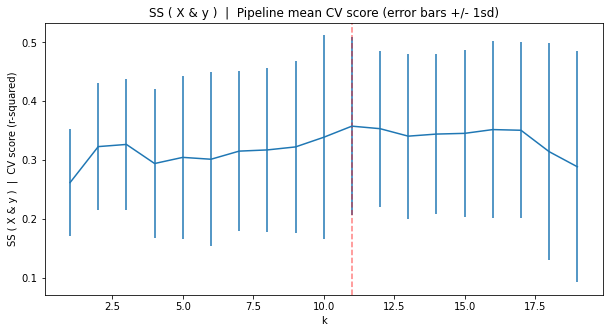

In [53]:
best_k_SS = lr_grid_cv_SS.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k_SS, score_mean_SS, yerr=score_std_SS)
plt.axvline(x=best_k_SS, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('SS ( X & y )  |  CV score (r-squared)')
plt.title('SS ( X & y )  |  Pipeline mean CV score (error bars +/- 1sd)');

**Fit & assess performance using cross-validation**

In [54]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [55]:
rf_default_cv_results = cross_validate(RF_pipe, X_train_SS, y_train_SS, cv=5)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [56]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.29018556, 0.35654933, 0.43844738, 0.52336298, 0.40502397])

In [57]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.4027138463982789, 0.07827159605642368)

**Hyperparameter search using GridSearchCV**

In [58]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [59]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [60]:
rf_grid_cv.fit(X_train_SS, y_train_SS)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [61]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 1000,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [62]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train_SS, y_train_SS, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

array([0.33212919, 0.37091815, 0.43599197, 0.576558  , 0.38570605])

In [63]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.4202606696085856, 0.08493785018316498)

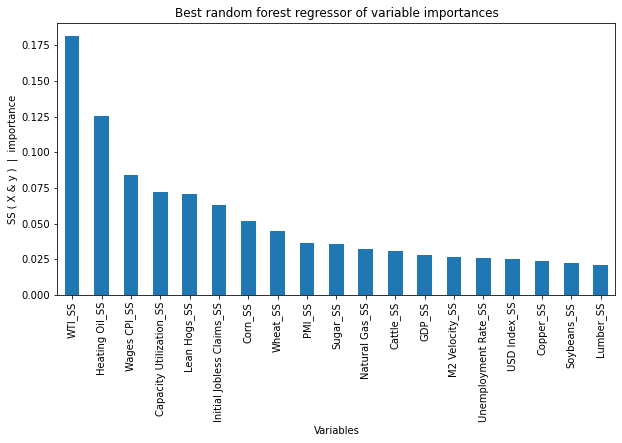

In [64]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train_SS.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('SS ( X & y )  |  importance')
plt.title('Best random forest regressor of variable importances');

**5.4.2 X only ( `_SS_y_uns` )**<a id='ss_y_un'></a>

In [65]:
pipe_SS_y_uns = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

In [66]:
k_SS_y_uns = [k_SS_y_uns+1 for k_SS_y_uns in range(len(X_train_SS_y_uns.columns))]
grid_params_SS_y_uns = {'selectkbest__k': k_SS_y_uns}

In [67]:
lr_grid_cv_SS_y_uns = GridSearchCV(pipe_SS_y_uns, param_grid=grid_params_SS_y_uns, cv=5, n_jobs=-1)

In [68]:
lr_grid_cv_SS_y_uns.fit(X_train_SS_y_uns, y_train_SS_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000001C51997C670>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19]})

In [69]:
score_mean_SS_y_uns = lr_grid_cv_SS_y_uns.cv_results_['mean_test_score']
score_std_SS_y_uns = lr_grid_cv_SS_y_uns.cv_results_['std_test_score']
cv_k_SS_y_uns = [k_SS_y_uns for k_SS_y_uns in lr_grid_cv_SS_y_uns.cv_results_['param_selectkbest__k']]

In [70]:
lr_grid_cv_SS_y_uns.best_params_

{'selectkbest__k': 11}

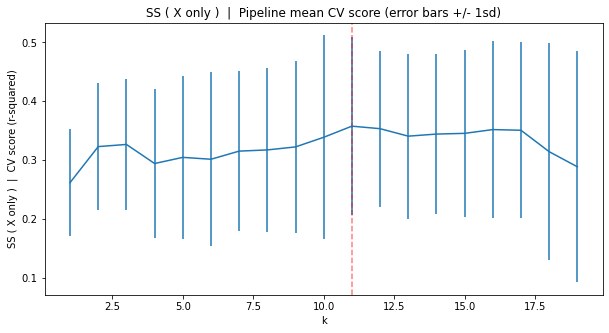

In [71]:
best_k_SS_y_uns = lr_grid_cv_SS_y_uns.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k_SS_y_uns, score_mean_SS_y_uns, yerr=score_std_SS_y_uns)
plt.axvline(x=best_k_SS_y_uns, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('SS ( X only )  |  CV score (r-squared)')
plt.title('SS ( X only )  |  Pipeline mean CV score (error bars +/- 1sd)');

In [72]:
RF_pipe_y_uns = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

**Fit & assess performance using cross-validation**

In [73]:
rf_default_cv_results_y_uns = cross_validate(RF_pipe_y_uns, X_train_SS_y_uns, y_train_SS_y_uns, cv=5)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [74]:
rf_cv_scores_y_uns = rf_default_cv_results_y_uns['test_score']
rf_cv_scores_y_uns

array([0.28148676, 0.38588461, 0.45127977, 0.54533618, 0.39533084])

In [75]:
np.mean(rf_cv_scores_y_uns), np.std(rf_cv_scores_y_uns)

(0.41186363178845464, 0.08638856766395665)

**Hyperparameter search using GridSearchCV**

In [76]:
n_est_y_uns = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params_y_uns = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params_y_uns

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [77]:
rf_grid_cv_y_uns = GridSearchCV(RF_pipe_y_uns, param_grid=grid_params_y_uns, cv=5, n_jobs=-1)

In [78]:
rf_grid_cv_y_uns.fit(X_train_SS_y_uns, y_train_SS_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [79]:
rf_grid_cv_y_uns.best_params_

{'randomforestregressor__n_estimators': 297,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [80]:
rf_best_cv_results_y_uns = cross_validate(rf_grid_cv_y_uns.best_estimator_, X_train_SS_y_uns, y_train_SS_y_uns, cv=5)
rf_best_scores_y_uns = rf_best_cv_results_y_uns['test_score']
rf_best_scores_y_uns

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

array([0.33725791, 0.35602023, 0.44562106, 0.58034189, 0.39321565])

In [81]:
np.mean(rf_best_scores_y_uns), np.std(rf_best_scores_y_uns)

(0.4224913481974342, 0.0871687922310932)

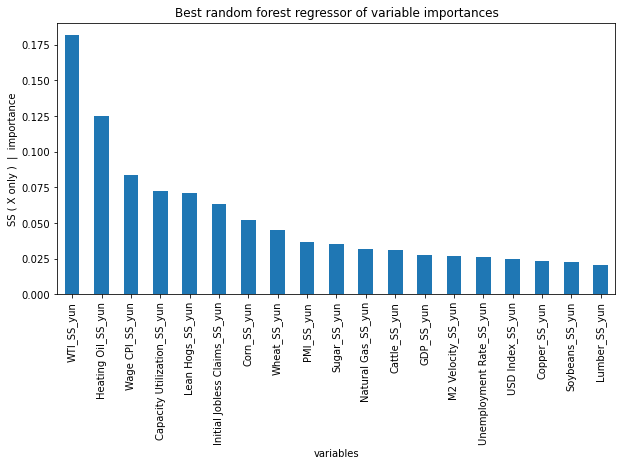

In [82]:
plt.subplots(figsize=(10, 5))
imps_y_uns = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps_y_uns = pd.Series(imps_y_uns, index=X_train_SS_y_uns.columns).sort_values(ascending=False)
rf_feat_imps_y_uns.plot(kind='bar')
plt.xlabel('variables')
plt.ylabel('SS ( X only )  |  importance')
plt.title('Best random forest regressor of variable importances');

**5.4.3 X & y ( `_LG` )**<a id='lg_both'></a>

In [83]:
pipe_LG = make_pipeline(
    SimpleImputer(strategy='median'), 
    PowerTransformer(),
    SelectKBest(f_regression),
    LinearRegression() # LogisticRegression() is for predicting 0 & 1
)

In [84]:
k_LG = [k_LG+1 for k_LG in range(len(X_train_LG.columns))]
grid_params_LG = {'selectkbest__k': k_LG}

In [85]:
lr_grid_cv_LG = GridSearchCV(pipe_LG, param_grid=grid_params_LG, cv=5, n_jobs=-1)

In [86]:
lr_grid_cv_LG.fit(X_train_LG, y_train_LG)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('powertransformer', PowerTransformer()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000001C51997C670>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19]})

In [87]:
score_mean_LG = lr_grid_cv_LG.cv_results_['mean_test_score']
score_std_LG = lr_grid_cv_LG.cv_results_['std_test_score']
cv_k_LG = [k_LG for k_LG in lr_grid_cv_LG.cv_results_['param_selectkbest__k']]

In [88]:
lr_grid_cv_LG.best_params_

{'selectkbest__k': 9}

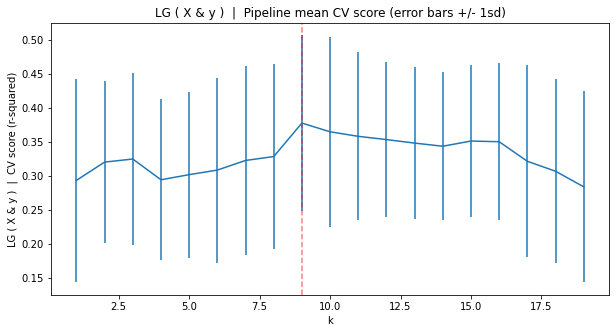

In [89]:
best_k_LG = lr_grid_cv_LG.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k_LG, score_mean_LG, yerr=score_std_LG)
plt.axvline(x=best_k_LG, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('LG ( X & y )  |  CV score (r-squared)')
plt.title('LG ( X & y )  |  Pipeline mean CV score (error bars +/- 1sd)');

In [90]:
RF_pipe_LG = make_pipeline(
    SimpleImputer(strategy='median'),
    PowerTransformer(),
    RandomForestRegressor(random_state=47)
)

**Fit & assess performance using cross-validation**

In [91]:
rf_default_cv_results_LG = cross_validate(RF_pipe_LG, X_train_LG, y_train_LG, cv=5)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [92]:
rf_cv_scores_LG = rf_default_cv_results_LG['test_score']
rf_cv_scores_LG

array([0.30544563, 0.36400411, 0.45324093, 0.51507354, 0.41496597])

In [93]:
np.mean(rf_cv_scores_LG), np.std(rf_cv_scores_LG)

(0.41054603533909184, 0.07208416740986381)

**Hyperparameter search using GridSearchCV**

In [94]:
n_est_LG = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params_LG = {
        'randomforestregressor__n_estimators': n_est,
        'powertransformer': [PowerTransformer(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params_LG

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'powertransformer': [PowerTransformer(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [95]:
rf_grid_cv_LG = GridSearchCV(RF_pipe_LG, param_grid=grid_params_LG, cv=5, n_jobs=-1)

In [96]:
rf_grid_cv_LG.fit(X_train_LG, y_train_LG)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('powertransformer', PowerTransformer()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'powertransformer': [PowerTransformer(), None],
                         'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                

In [97]:
rf_grid_cv_LG.best_params_

{'powertransformer': None,
 'randomforestregressor__n_estimators': 1000,
 'simpleimputer__strategy': 'mean'}

In [98]:
rf_best_cv_results_LG = cross_validate(rf_grid_cv_LG.best_estimator_, X_train_LG, y_train_LG, cv=5)
rf_best_scores_LG = rf_best_cv_results_LG['test_score']
rf_best_scores_LG

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

array([0.3368261 , 0.37892975, 0.44635381, 0.57518199, 0.38741163])

In [99]:
np.mean(rf_best_scores_LG), np.std(rf_best_scores_LG)

(0.4249406535138268, 0.08284996972770561)

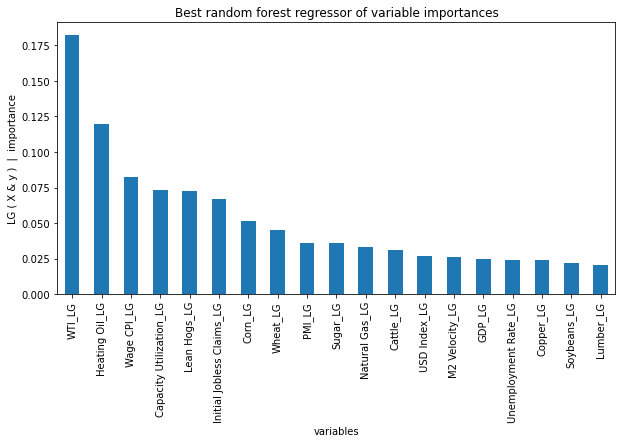

In [100]:
plt.subplots(figsize=(10, 5))
imps_LG = rf_grid_cv_LG.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps_LG = pd.Series(imps_LG, index=X_train_LG.columns).sort_values(ascending=False)
rf_feat_imps_LG.plot(kind='bar')
plt.xlabel('variables')
plt.ylabel('LG ( X & y )  |  importance')
plt.title('Best random forest regressor of variable importances');

**5.4.4 X only ( `_LG_y_uns` )**<a id='lg_y_un'></a>

In [101]:
pipe_LG_y_uns = make_pipeline(
    SimpleImputer(strategy='median'), 
    PowerTransformer(),
    SelectKBest(f_regression),
    LinearRegression() # should this be LogisticRegression()
)

In [102]:
k_LG_y_uns = [k_LG_y_uns+1 for k_LG_y_uns in range(len(X_train_LG_y_uns.columns))]
grid_params_LG_y_uns = {'selectkbest__k': k_LG_y_uns}

In [103]:
lr_grid_cv_LG_y_uns = GridSearchCV(pipe_LG_y_uns, param_grid=grid_params_LG_y_uns, cv=5, n_jobs=-1)

In [104]:
lr_grid_cv_LG_y_uns.fit(X_train_LG_y_uns, y_train_LG_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('powertransformer', PowerTransformer()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000001C51997C670>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19]})

In [105]:
score_mean_LG_y_uns = lr_grid_cv_LG_y_uns.cv_results_['mean_test_score']
score_std_LG_y_uns = lr_grid_cv_LG_y_uns.cv_results_['std_test_score']
cv_k_LG_y_uns = [k_LG_y_uns for k_LG_y_uns in lr_grid_cv_LG_y_uns.cv_results_['param_selectkbest__k']]

In [106]:
lr_grid_cv_LG_y_uns.best_params_

{'selectkbest__k': 9}

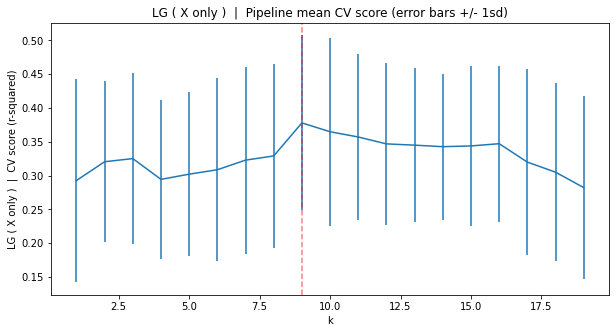

In [107]:
best_k_LG_y_uns = lr_grid_cv_LG_y_uns.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k_LG_y_uns, score_mean_LG_y_uns, yerr=score_std_LG_y_uns)
plt.axvline(x=best_k_LG_y_uns, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('LG ( X only )  |  CV score (r-squared)')
plt.title('LG ( X only )  |  Pipeline mean CV score (error bars +/- 1sd)');

In [108]:
RF_pipe_LG_y_uns = make_pipeline(
    SimpleImputer(strategy='median'),
    PowerTransformer(),
    RandomForestRegressor(random_state=47)
)

**Fit & assess performance using cross-validation**

In [109]:
rf_default_cv_results_LG_y_uns = cross_validate(RF_pipe_LG_y_uns, X_train_LG_y_uns, y_train_LG_y_uns, cv=5)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [110]:
rf_cv_scores_LG_y_uns = rf_default_cv_results_LG_y_uns['test_score']
rf_cv_scores_LG_y_uns

array([0.29538195, 0.38678878, 0.45250326, 0.54735776, 0.3992878 ])

In [111]:
np.mean(rf_cv_scores_LG_y_uns), np.std(rf_cv_scores_LG_y_uns)

(0.4162639090921714, 0.08278684487482141)

**Hyperparameter search using GridSearchCV**

In [112]:
n_est_LG_y_uns = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params_LG_y_uns = {
        'randomforestregressor__n_estimators': n_est,
        'powertransformer': [PowerTransformer(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params_LG_y_uns

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'powertransformer': [PowerTransformer(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [113]:
rf_grid_cv_LG_y_uns = GridSearchCV(RF_pipe_LG_y_uns, param_grid=grid_params_LG_y_uns, cv=5, n_jobs=-1)

In [114]:
rf_grid_cv_LG_y_uns.fit(X_train_LG_y_uns, y_train_LG_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('powertransformer', PowerTransformer()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'powertransformer': [PowerTransformer(), None],
                         'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                

In [115]:
rf_grid_cv_LG_y_uns.best_params_

{'powertransformer': None,
 'randomforestregressor__n_estimators': 297,
 'simpleimputer__strategy': 'mean'}

In [116]:
rf_best_cv_results_LG_y_uns = cross_validate(rf_grid_cv_LG_y_uns.best_estimator_, X_train_LG_y_uns, y_train_LG_y_uns, cv=5)
rf_best_scores_LG_y_uns = rf_best_cv_results_LG_y_uns['test_score']
rf_best_scores_LG_y_uns

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

array([0.34228516, 0.35763695, 0.44863869, 0.58042431, 0.39526423])

In [117]:
np.mean(rf_best_scores_LG_y_uns), np.std(rf_best_scores_LG_y_uns)

(0.4248498671996158, 0.0859989905031364)

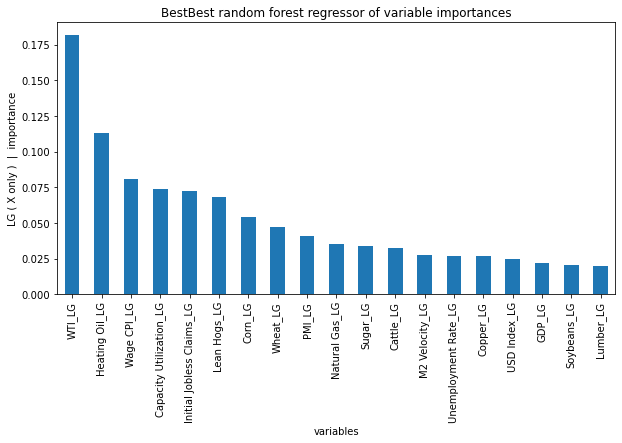

In [118]:
plt.subplots(figsize=(10, 5))
imps_LG_y_uns = rf_grid_cv_LG_y_uns.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps_LG_y_uns = pd.Series(imps_LG_y_uns, index=X_train_LG_y_uns.columns).sort_values(ascending=False)
rf_feat_imps_LG_y_uns.plot(kind='bar')
plt.xlabel('variables')
plt.ylabel('LG ( X only )  |  importance')
plt.title('BestBest random forest regressor of variable importances');

**5.4.5 Combination of `SS` & `LG` for X only ( `_SS_LG` )**<a id='combo'></a>|

In [119]:
pipe__SS_LG = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression() # should this be LogisticRegression()
)

In [120]:
k_SS_LG = [k_SS_LG+1 for k_SS_LG in range(len(X_tr_SS_LG.columns))]
grid_params_SS_LG = {'selectkbest__k': k_SS_LG}

In [121]:
lr_grid_cv_SS_LG = GridSearchCV(pipe__SS_LG, param_grid=grid_params_SS_LG, cv=5, n_jobs=-1)

In [122]:
lr_grid_cv_SS_LG.fit(X_tr_SS_LG, y_tr_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000001C51997C670>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19]})

In [123]:
score_mean_SS_LG = lr_grid_cv_SS_LG.cv_results_['mean_test_score']
score_std_SS_LG = lr_grid_cv_SS_LG.cv_results_['std_test_score']
cv_k_SS_LG = [k_SS_LG for k_SS_LG in lr_grid_cv_SS_LG.cv_results_['param_selectkbest__k']]

In [124]:
lr_grid_cv_SS_LG.best_params_

{'selectkbest__k': 10}

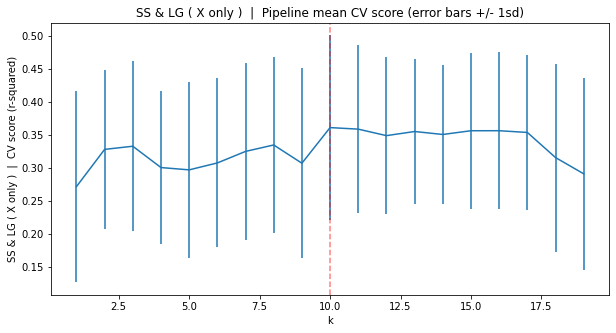

In [125]:
best_k_SS_LG = lr_grid_cv_SS_LG.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k_SS_LG, score_mean_SS_LG, yerr=score_std_SS_LG)
plt.axvline(x=best_k_SS_LG, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('SS & LG ( X only )  |  CV score (r-squared)')
plt.title('SS & LG ( X only )  |  Pipeline mean CV score (error bars +/- 1sd)');

In [126]:
RF_pipe_SS_LG = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

**Fit & assess performance using cross-validation**

In [127]:
rf_default_cv_results_SS_LG = cross_validate(RF_pipe_SS_LG, X_tr_SS_LG, y_tr_y_uns, cv=5)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [128]:
rf_cv_scores_SS_LG = rf_default_cv_results_SS_LG['test_score']
rf_cv_scores_SS_LG

array([0.26147755, 0.38978811, 0.44548496, 0.55355222, 0.38528794])

In [129]:
np.mean(rf_cv_scores_SS_LG), np.std(rf_cv_scores_SS_LG)

(0.4071181572729383, 0.09476604955141636)

In [130]:
n_est_SS_LG = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params_SS_LG = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median']
}
grid_params_SS_LG

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None],
 'simpleimputer__strategy': ['mean', 'median']}

In [131]:
rf_grid_cv_SS_LG = GridSearchCV(RF_pipe_SS_LG, param_grid=grid_params_SS_LG, cv=5, n_jobs=-1)

In [132]:
rf_grid_cv_SS_LG.fit(X_tr_SS_LG, y_tr_y_uns)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [133]:
rf_grid_cv_SS_LG.best_params_

{'randomforestregressor__n_estimators': 297,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

In [134]:
rf_best_cv_results_SS_LG = cross_validate(rf_grid_cv_SS_LG.best_estimator_, X_tr_SS_LG, y_tr_y_uns, cv=5)
rf_best_scores_SS_LG = rf_best_cv_results_SS_LG['test_score']
rf_best_scores_SS_LG

C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\rands\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

array([0.34101508, 0.37237672, 0.44164163, 0.58634272, 0.38621366])

In [135]:
np.mean(rf_best_scores_SS_LG), np.std(rf_best_scores_SS_LG)

(0.425517962398687, 0.08675728623732921)

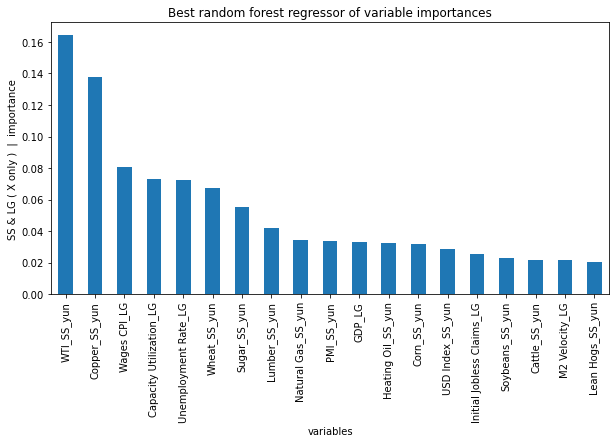

In [136]:
plt.subplots(figsize=(10, 5))
imps_SS_LG = rf_grid_cv_SS_LG.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps_SS_LG = pd.Series(imps_SS_LG, index=X_tr_SS_LG.columns).sort_values(ascending=False)
rf_feat_imps_SS_LG.plot(kind='bar')
plt.xlabel('variables')
plt.ylabel('SS & LG ( X only )  |  importance')
plt.title('Best random forest regressor of variable importances');

## 5.5 Initial Findings<a id='int_find'></a>

By and large, `WTI` controlled first place on all five (5) of the structures. It's counterpart `Heating Oil` showed up alongside on four (4) of them, which makes sense as it's a derivative of `WTI`. `WTI` controlling first place may be a result of it being incorporated in just about every activity & purchase made in the United States. For example, a loaf of bread. The grains required to make dough are usually plowed by a tractor using gasoline ( which is made with `WTI` ). It is then transported to a bakery ( using gasoline ). It's then transported to a store, purchased by a customer & driven home ( all using a derivative of `WTI` ). 

The two (2) variables which showed up near the top on a consistent basis were `Wages CPI` & `Capacity Utilization`. These may be justified as `Wages CPI` is a component of the reported `Inflation` numbers while `Capacity Utilization` is connected to inventory management & price elasticity of demand; if `Capacity Utilization` is low then it may be prudent to assume firms will reduce their prices & conversely.

The **optimal k value varied between each structure**. Outlined below are the optimal k values & the variables for each:
   * **SS ( X & y ) | 11**
     1. WTI
     2. Heating Oil
     3. Wages CPI
     4. Capacity Utilization
     5. Lean Hogs
     6. Initial Jobless Claims
     7. Corn
     8. Wheat
     9. PMI
     10. Sugar
     11. Natural Gas
   * **SS ( X only ) | 11**
     * Same variables & order as SS ( X & y )
   * **LG ( X & y ) | 9**
     * The first 9 of SS ( X & y ) in the same order
   * **LG ( X only ) | 9**
     * The first 9 of SS ( X & y ) in the same order
   * **SS & LG ( X only ) | 10**
     1. WTI
     2. Copper
     3. Wages CPI
     4. Capacity Utilization
     5. Unemployment Rate
     6. Wheat
     7. Sugar
     8. Lumber
     9. Natural Gas
     10. PMI

The next step is to drop those that reduced the model’s performance for each & determine what results we are presented with.

## 5.6 Modeling with the Most important Variables<a id='mod_imp'></a>

We will now rerun the modeling process using only those highlighted above. Before so, we will pull back in fresh sets of data to ensure cleanliness & then drop "the others".

In [173]:
# StandardScaler | X & y scaled
X_train_SS_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_train_SS.xlsx', index_col=None)
y_train_SS_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_train_SS.xlsx', index_col=None)
X_test_SS_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_test_SS.xlsx', index_col=None)
y_test_SS_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_test_SS.xlsx', index_col=None)

# Standard Scaler | X only scaled
X_train_SS_y_uns_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_train_SS_y_uns.xlsx', index_col=None)
y_train_SS_y_uns_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_train_SS_y_uns.xlsx', index_col=None)
X_test_SS_y_uns_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_test_SS_y_uns.xlsx', index_col=None)
y_test_SS_y_uns_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_test_SS_y_uns.xlsx', index_col=None)

# Log Scaler | X & y scaled
X_train_LG_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_train_LG.xlsx', index_col=None)
y_train_LG_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_train_LG.xlsx', index_col=None)
X_test_LG_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_test_LG.xlsx', index_col=None)
y_test_LG_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_test_LG.xlsx', index_col=None)

# Log Scaler | X only scaled
X_train_LG_y_uns_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_train_LG_y_uns.xlsx', index_col=None)
y_train_LG_y_uns_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_train_LG_y_uns.xlsx', index_col=None)
X_test_LG_y_uns_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_test_LG_y_uns.xlsx', index_col=None)
y_test_LG_y_uns_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_test_LG.xlsx', index_col=None)

# StandardScaler & Log Combined | X only scaled
X_tr_SS_LG_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_tr_SS_LG.xlsx', index_col=None)
y_tr_y_uns_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_tr_y_uns.xlsx', index_col=None)
X_te_SS_LG_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/X_te_SS_LG.xlsx', index_col=None)
y_te_y_uns_two = pd.read_excel('./_Inflation_Capstone/data/4.0 Pre Processing Data/y_te_y_uns.xlsx', index_col=None)

print('Finished; proceed')

Finished; proceed


In [174]:
X_train_SS_two.columns

Index(['Unnamed: 0', 'Wages CPI_SS', 'WTI_SS', 'Heating Oil_SS', 'Copper_SS',
       'Sugar_SS', 'Natural Gas_SS', 'Cattle_SS', 'Lean Hogs_SS',
       'Soybeans_SS', 'Lumber_SS', 'Capacity Utilization_SS', 'Corn_SS',
       'M2 Velocity_SS', 'GDP_SS', 'Wheat_SS', 'PMI_SS', 'USD Index_SS',
       'Unemployment Rate_SS', 'Initial Jobless Claims_SS'],
      dtype='object')

In [175]:
y_drop_cols = ['Unnamed: 0']

In [176]:
X_drop_cols_SS = ['Unnamed: 0', 'Copper_SS','Cattle_SS', 'Soybeans_SS', 'Lumber_SS',
       'M2 Velocity_SS', 'GDP_SS', 'USD Index_SS','Unemployment Rate_SS']

In [177]:
# StandardScaler | X & y scaled
X_train_SS_two.drop(columns=X_drop_cols_SS, inplace=True)
y_train_SS_two.drop(columns=y_drop_cols, inplace=True)
X_test_SS_two.drop(columns=X_drop_cols_SS, inplace=True)
y_test_SS_two.drop(columns=y_drop_cols, inplace=True)

print('Finished; proceed')

Finished; proceed


In [178]:
X_drop_cols_SS_yun = ['Unnamed: 0', 'Copper_SS_yun','Cattle_SS_yun', 'Soybeans_SS_yun', 'Lumber_SS_yun',
       'M2 Velocity_SS_yun', 'GDP_SS_yun', 'USD Index_SS_yun','Unemployment Rate_SS_yun']

In [179]:
# StandardScaler | X & y scaled
X_train_SS_y_uns_two.drop(columns=X_drop_cols_SS_yun, inplace=True)
y_train_SS_y_uns_two.drop(columns=y_drop_cols, inplace=True)
X_test_SS_y_uns_two.drop(columns=X_drop_cols_SS_yun, inplace=True)
y_test_SS_y_uns_two.drop(columns=y_drop_cols, inplace=True)

print('Finished; proceed')

Finished; proceed


In [180]:
X_train_LG_two.head(1)

,Unnamed: 0,Wage CPI_LG,WTI_LG,Heating Oil_LG,Copper_LG,Sugar_LG,Natural Gas_LG,Cattle_LG,Lean Hogs_LG,Soybeans_LG,Lumber_LG,Capacity Utilization_LG,Corn_LG,M2 Velocity_LG,GDP_LG,Wheat_LG,PMI_LG,USD Index_LG,Unemployment Rate_LG,Initial Jobless Claims_LG
0,206,-0.14655,0.279614,0.427785,-0.69986,0.652751,-0.446266,0.286163,-0.838841,1.612618,-1.240078,0.301428,1.581462,-0.561862,-0.409835,2.004633,-0.951198,-1.720193,-0.145277,0.01184


In [181]:
X_drop_cols_LG = ['Unnamed: 0', 'Copper_LG','Cattle_LG', 'Soybeans_LG', 'Lumber_LG',
       'M2 Velocity_LG', 'GDP_LG', 'USD Index_LG','Unemployment Rate_LG','Natural Gas_LG','Sugar_LG']

In [182]:
# Log Scaler | X & y scaled
X_train_LG_two.drop(columns=X_drop_cols_LG, inplace=True)
y_train_LG_two.drop(columns=y_drop_cols, inplace=True)
X_test_LG_two.drop(columns=X_drop_cols_LG, inplace=True)
y_test_LG_two.drop(columns=y_drop_cols, inplace=True)
print('Finished; proceed')

Finished; proceed


In [183]:
X_tr_SS_LG_two.columns

Index(['Unnamed: 0', 'WTI_SS_yun', 'Copper_SS_yun', 'Soybeans_SS_yun',
       'Natural Gas_SS_yun', 'Heating Oil_SS_yun', 'Corn_SS_yun',
       'Wheat_SS_yun', 'Cattle_SS_yun', 'Lean Hogs_SS_yun', 'Sugar_SS_yun',
       'Lumber_SS_yun', 'PMI_SS_yun', 'USD Index_SS_yun', 'Wages CPI_LG',
       'Capacity Utilization_LG', 'GDP_LG', 'M2 Velocity_LG',
       'Initial Jobless Claims_LG', 'Unemployment Rate_LG'],
      dtype='object')

In [184]:
X_drop_cols_SS_LG = ['Unnamed: 0', 'Soybeans_SS_yun','Heating Oil_SS_yun', 'Corn_SS_yun',
                  'Cattle_SS_yun', 'Lean Hogs_SS_yun','USD Index_SS_yun','GDP_LG',
                  'M2 Velocity_LG','Initial Jobless Claims_LG']

In [185]:
# StandardScaler & Log Combined | X only scaled
X_tr_SS_LG_two.drop(columns=X_drop_cols_SS_LG, inplace=True)
y_tr_y_uns_two.drop(columns=y_drop_cols, inplace=True)
X_te_SS_LG_two.drop(columns=X_drop_cols_SS_LG, inplace=True)
y_te_y_uns_two.drop(columns=y_drop_cols, inplace=True)
print('Finished; proceed')

Finished; proceed


The variables we did not wish to include are now removed; next to model.

**5.6.1 X & y ( `_SS_two` )**<a id='ss_imp'></a>

In [187]:
reg_all_SS = LinearRegression(X_train_SS_two,y_train_SS_two)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=     Wages CPI_SS    WTI_SS  Heating Oil_SS  Sugar_SS  Natural Gas_SS  \
0       -0.034522  0.337816        0.481291  0.523783       -0.489975   
1       -0.006641  0.173265       -0.160271 -0.083423        0.835685   
2        0.734313  1.289719        1.601918  0.422772        1.545136   
3        0.198463  0.493904       -0.159112 -0.987941       -0.619715   
4        0.416816 -0.890056       -0.967141 -0.279105        2.130671   
..            ...       ...             ...       ...             ...   
219      0.500885  0.543732        0.674641  1.144592        0.492504   
220     -2.361064 -2.426381       -1.658603 -0.898251       -1.518032   
221     -0.272516  0.701845       -0.047781 -0.717397       -1.359891   
222      0.617031  0.670212        0.273391  0.417402        0.283614   
223     -0.633720 -0.712655       -0.710510 -1.025368       -0.576589   

     Lean Hogs

In [188]:
lm = LinearRegression().fit(X_train_SS_two,y_train_SS_two)

In [189]:
y_tr_pred_SS_two = lm.predict(X_train_SS_two)
y_te_pred_SS_two = lm.predict(X_test_SS_two)

In [190]:
median_r2_SS = r2_score(y_train_SS_two, y_tr_pred_SS_two), r2_score(y_test_SS_two, y_te_pred_SS_two)
median_r2_SS

(0.4919716583771264, 0.2705682608756448)

In [191]:
median_mae_SS = mean_absolute_error( y_train_SS_two, y_tr_pred_SS_two ), mean_absolute_error( y_test_SS_two, y_te_pred_SS_two )
median_mae_SS

(0.5143454301589306, 0.6132569313826873)

In [192]:
median_mse_SS = mean_squared_error( y_train_SS_two, y_tr_pred_SS_two ), mean_squared_error( y_test_SS_two, y_te_pred_SS_two )
median_mse_SS

(0.5080283416228736, 0.677602118684446)

**5.6.2 X only ( `_SS_y_uns_two` )**<a id='ss_imp_uns'></a>

In [193]:
reg_all_SS_y_uns = LinearRegression(X_train_SS_y_uns_two,y_train_SS_y_uns_two)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=     Wage CPI_SS_yun  WTI_SS_yun  Heating Oil_SS_yun  Sugar_SS_yun  \
0          -0.034522    0.337816            0.481291      0.523783   
1          -0.006641    0.173265           -0.160271     -0.083423   
2           0.734313    1.289719            1.601918      0.422772   
3           0.198463    0.493904           -0.159112     -0.987941   
4           0.416816   -0.890056           -0.967141     -0.279105   
..               ...         ...                 ...           ...   
219         0.500885    0.543732            0.674641      1.144592   
220        -2.361064   -2.426381           -1.658603     -0.898251   
221        -0.272516    0.701845           -0.047781     -0.717397   
222         0.617031    0.670212            0.273391      0.417402   
223        -0.633720   -0.712655           -0.710510     -1.025368   

     Natural Gas_SS_yun  Lean Hogs_SS_yun  Capacit

In [194]:
lm = LinearRegression().fit(X_train_SS_y_uns_two,y_train_SS_y_uns_two)

In [195]:
y_tr_pred_SS_y_uns_two = lm.predict(X_train_SS_y_uns_two)
y_te_pred_SS_y_uns_two = lm.predict(X_test_SS_y_uns_two)

In [196]:
median_r2_SS_y_uns_two = r2_score(y_train_SS_y_uns_two, y_tr_pred_SS_y_uns_two), r2_score(y_test_SS_y_uns_two, y_te_pred_SS_y_uns_two)
median_r2_SS_y_uns_two

(0.4919716583771264, 0.2734061000086945)

In [197]:
median_mae_SS_y_uns_two = mean_absolute_error( y_train_SS_y_uns_two, y_tr_pred_SS_y_uns_two ), mean_absolute_error( y_test_SS_y_uns_two, y_te_pred_SS_y_uns_two )
median_mae_SS_y_uns_two

(0.4525686860994493, 0.6034250403588892)

In [198]:
median_mse_SS_y_uns_two = mean_squared_error( y_train_SS_y_uns_two, y_tr_pred_SS_y_uns_two ), mean_squared_error( y_test_SS_y_uns_two, y_te_pred_SS_y_uns_two )
median_mse_SS_y_uns_two

(0.3933210341283799, 0.6749659216204842)

**5.6.3 X & y ( `_LG_two` )**<a id='lg_imp'></a>

In [199]:
reg_all_LG_two = LinearRegression(X_train_LG_two,y_train_LG_two)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=     Wage CPI_LG    WTI_LG  Heating Oil_LG  Lean Hogs_LG  \
0      -0.146550  0.279614        0.427785     -0.838841   
1      -0.115504  0.104109       -0.252962      1.692675   
2       0.782497  1.383236        1.816585      0.972792   
3       0.118776  0.450241       -0.251805     -0.101458   
4       0.379946 -0.925203       -0.999705      0.205224   
..           ...       ...             ...           ...   
219     0.483850  0.505562        0.649033      1.328205   
220    -2.171560 -2.155485       -1.559820     -2.119326   
221    -0.404027  0.683840       -0.139463     -0.248476   
222     0.630556  0.647840        0.198259      0.659047   
223    -0.770120 -0.765238       -0.774157     -0.025231   

     Capacity Utilization_LG   Corn_LG  Wheat_LG    PMI_LG  \
0                   0.301428  1.581462  2.004633 -0.951198   
1                   0.778567  0.754859  0.2378

In [200]:
lm = LinearRegression().fit(X_train_LG_two,y_train_LG_two)

In [201]:
y_tr_pred_LG_two = lm.predict(X_train_LG_two)
y_te_pred_LG_two = lm.predict(X_test_LG_two)

In [202]:
median_r2_LG_two = r2_score(y_train_LG_two, y_tr_pred_LG_two), r2_score(y_test_LG_two, y_te_pred_LG_two)
median_r2_LG_two

(0.4682408433685529, 0.28624066156229744)

In [203]:
median_mae_LG_two = mean_absolute_error( y_train_LG_two, y_tr_pred_LG_two ), mean_absolute_error( y_test_LG_two, y_te_pred_LG_two )
median_mae_LG_two

(0.5261462015762275, 0.5954907834816847)

In [204]:
median_mse_LG_two = mean_squared_error( y_train_LG_two, y_tr_pred_LG_two ), mean_squared_error( y_test_LG_two, y_te_pred_LG_two )
median_mse_LG_two

(0.5317591566314471, 0.6676492142587368)

**5.6.4 X & y ( `_LG_y_uns_two` )**<a id='ss_lg_imp'></a>

In [205]:
reg_all_LG_y_uns_two = LinearRegression(X_train_LG_y_uns_two,y_train_LG_y_uns_two)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=     Unnamed: 0  Wage CPI_LG    WTI_LG  Heating Oil_LG  Copper_LG  Sugar_LG  \
0           206    -0.146550  0.279614        0.427785  -0.699860  0.652751   
1            81    -0.115504  0.104109       -0.252962  -0.590661  0.053145   
2           147     0.782497  1.383236        1.816585   1.595217  0.560180   
3            39     0.118776  0.450241       -0.251805  -0.140201 -1.065297   
4           222     0.379946 -0.925203       -0.999705  -0.516578 -0.164412   
..          ...          ...       ...             ...        ...       ...   
219         188     0.483850  0.505562        0.649033  -0.527407  1.168459   
220          71    -2.171560 -2.155485       -1.559820  -1.076619 -0.941106   
221         106    -0.404027  0.683840       -0.139463  -0.024408 -0.699876   
222         270     0.630556  0.647840        0.198259  -0.880771  0.555184   
223         102    -0.

In [206]:
lm = LinearRegression().fit(X_train_LG_y_uns_two,y_train_LG_y_uns_two)

In [207]:
y_tr_pred_LG_y_uns_two = lm.predict(X_train_LG_y_uns_two)
y_te_pred_LG_y_uns_two = lm.predict(X_test_LG_y_uns_two)

In [208]:
median_r2_LG_y_uns_two = r2_score(y_train_LG_y_uns_two, y_tr_pred_LG_y_uns_two), r2_score(y_test_LG_y_uns_two, y_te_pred_LG_y_uns_two)
median_r2_LG_y_uns_two

(0.7563443791876051, 0.6524354906023515)

In [209]:
median_mae_LG_y_uns_two = mean_absolute_error( y_train_LG_y_uns_two, y_tr_pred_LG_y_uns_two ), mean_absolute_error( y_test_LG_y_uns_two, y_te_pred_LG_y_uns_two )
median_mae_LG_y_uns_two

(0.22293065667840248, 0.2939599506830862)

In [210]:
median_mse_LG_y_uns_two = mean_squared_error( y_train_LG_y_uns_two, y_tr_pred_LG_y_uns_two ), mean_squared_error( y_test_LG_y_uns_two, y_te_pred_LG_y_uns_two )
median_mse_LG_y_uns_two

(0.18864081567375426, 0.3251112232191369)

**5.6.5 X only ( `_SS_LG_two` )**<a id='ss_lg_imp_n'></a>

In [211]:
reg_all_SS_LG_two = LinearRegression(X_tr_SS_LG_two,y_tr_y_uns_two)

C:\Users\rands\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=     WTI_SS_yun  Copper_SS_yun  Natural Gas_SS_yun  Wheat_SS_yun  \
0      0.337816       0.481291            0.523783     -0.846294   
1      0.173265      -0.160271           -0.083423      1.791885   
2      1.289719       1.601918            0.422772      0.961819   
3      0.493904      -0.159112           -0.987941     -0.155382   
4     -0.890056      -0.967141           -0.279105      0.149382   
..          ...            ...                 ...           ...   
219    0.543732       0.674641            1.144592      1.363114   
220   -2.426381      -1.658603           -0.898251     -1.935794   
221    0.701845      -0.047781           -0.717397     -0.297631   
222    0.670212       0.273391            0.417402      0.620958   
223   -0.712655      -0.710510           -1.025368     -0.080658   

     Sugar_SS_yun  Lumber_SS_yun  PMI_SS_yun  Wages CPI_LG  \
0        1.6

In [212]:
lm = LinearRegression().fit(X_tr_SS_LG_two,y_tr_y_uns_two)

In [213]:
y_tr_pred_SS_LG_two = lm.predict(X_tr_SS_LG_two)
y_te_pred_SS_LG_two = lm.predict(X_te_SS_LG_two)

In [214]:
median_r2_SS_LG_two = r2_score(y_tr_y_uns_two, y_tr_pred_SS_LG_two), r2_score(y_te_y_uns_two, y_te_pred_SS_LG_two)
median_r2_SS_LG_two

(0.47764155029553956, 0.29180288548112143)

In [215]:
median_mae_SS_LG_two = mean_absolute_error( y_train_LG_y_uns_two, y_tr_pred_LG_y_uns_two ), mean_absolute_error( y_test_LG_y_uns_two, y_te_pred_LG_y_uns_two )
median_mae_SS_LG_two

(0.22293065667840248, 0.2939599506830862)

In [216]:
median_mse_SS_LG_two = mean_squared_error( y_train_LG_y_uns_two, y_tr_pred_LG_y_uns_two ), mean_squared_error( y_test_LG_y_uns_two, y_te_pred_LG_y_uns_two )
median_mse_SS_LG_two

(0.18864081567375426, 0.3251112232191369)

## 5.7 Conclusion<a id='conclusion'></a>

We utilized the random forest model to determine which variables were of most importance in understanding `Inflation`; they are highlighted above. 

We then isolated these variables to model against `Inflation`; we will summarize the findings below:

In [217]:
print(' R² results for X & y scaled below',
    '\n','SS Train |',round(median_r2_SS[0],4),'  Test', round(median_r2_SS[1],4),

      '\n','LG Train |',round(median_r2_LG_two[0],4),'  Test', round(median_r2_LG_two[1],4),'\n','\n',

     'R² results for X only scaled below',
    '\n','SS Train |',round(median_r2_SS_y_uns_two[0],4),'  Test', round(median_r2_SS_y_uns_two[1],4),

      '\n','LG Train |',round(median_r2_LG_y_uns_two[0],4),'  Test', round(median_r2_LG_y_uns_two[1],4),'\n','\n'

      ' R² results for the LG & SS combination below',
    '\n','SS Train |',round(median_r2_SS_LG_two[0],4),'  Test', round(median_r2_SS_LG_two[1],4),

     )

 R² results for X & y scaled below 
 SS Train | 0.492   Test 0.2706 
 LG Train | 0.4682   Test 0.2862 
 
 R² results for X only scaled below 
 SS Train | 0.492   Test 0.2734 
 LG Train | 0.7563   Test 0.6524 
 
 R² results for the LG & SS combination below 
 SS Train | 0.4776   Test 0.2918


After removing variables which were deemed to be hurting the performance with the Random Forest Model, the results show a notable improvement. The `LG` on the `X only` proved to be the best.  

Below we will look at the `mae` & `mse` scores as well.

In [218]:
print(' MAE results for X & y scaled below',
    '\n','SS Train |',round(median_mae_SS[0],4),'  Test', round(median_mae_SS[1],4),
     
      '\n','LG Train |',round(median_mae_LG_two[0],4),'  Test', round(median_mae_LG_two[1],4),'\n','\n',
      
     'MAE results for X only scaled below',
    '\n','SS Train |',round(median_mae_SS_y_uns_two[0],4),'  Test', round(median_mae_SS_y_uns_two[1],4),
     
      '\n','LG Train |',round(median_mae_LG_y_uns_two[0],4),'  Test', round(median_mae_LG_y_uns_two[1],4),'\n','\n',
      
      'MAE results for the LG & SS combination below',
    '\n','SS Train |',round(median_mae_SS_LG_two[0],4),'  Test', round(median_mae_SS_LG_two[1],4),
      
     )

 MAE results for X & y scaled below 
 SS Train | 0.5143   Test 0.6133 
 LG Train | 0.5261   Test 0.5955 
 
 MAE results for X only scaled below 
 SS Train | 0.4526   Test 0.6034 
 LG Train | 0.2229   Test 0.294 
 
 MAE results for the LG & SS combination below 
 SS Train | 0.2229   Test 0.294


In [219]:
print(' MSE results for X & y scaled below',
    '\n','SS Train |',round(median_mse_SS[0],4),'  Test', round(median_mse_SS[1],4),
      
      '\n','LG Train |',round(median_mse_LG_two[0],4),'  Test', round(median_mse_LG_two[1],4),
      '\n','\n',
     'MSE results for X only scaled below',
    '\n','SS Train |',round(median_mse_SS_y_uns_two[0],4),'  Test', round(median_mse_SS_y_uns_two[1],4),
      
      '\n','LG Train |',round(median_mse_LG_y_uns_two[0],4),'  Test', round(median_mse_LG_y_uns_two[1],4),
      '\n','\n',
      'MSE results for the LG & SS combination below',
    '\n','SS Train |',round(median_mse_SS_LG_two[0],4),'  Test', round(median_mse_SS_LG_two[1],4),
     
     )

 MSE results for X & y scaled below 
 SS Train | 0.508   Test 0.6776 
 LG Train | 0.5318   Test 0.6676 
 
 MSE results for X only scaled below 
 SS Train | 0.3933   Test 0.675 
 LG Train | 0.1886   Test 0.3251 
 
 MSE results for the LG & SS combination below 
 SS Train | 0.1886   Test 0.3251


These show drops in all with the exception of `SS` `X only` which saw an increase of 3.5 bps & 14.4 bps on `MAE` & `MSE` respectively. 

As the `R²` for `LG` `X only` in the test set presented the best results with the lowest `mae` & `mse` (tied with `LG & SS` on both), I confirm this is the final selection as the test set is the arbiter.

As for a recap, we went through the machine learning process with the help of Random Forests to:
   * Scale the data effectively
   * Identify the most important variables

I will end with a reminder of the process that was taken to get to the end step by step: 
   * Started with 19 variables which best correlated with `Inflation`
   * Discrete tacks to fill in the gaps & using a rolling average on all without Winsorizing `Inflation` was determined the best
   * Eight (8) variables were chosen to engage with Winsorization increasing their Pearson Coefficients by 172.67 bps on average
   * The data was then sent to scaling via Standard Scaling, Min Max Scaling & Log Transformation before sent to Modeling
   * Random Forest was used for Modeling the Log Transformation on X only presented the highest R² & lowest MAE & MSE

**Final & best results below**

In [227]:
print(' R² results for X only scaled below',
      '\n','LG Train |',round(median_r2_LG_y_uns_two[0],4),'  Test', round(median_r2_LG_y_uns_two[1],4),'\n','\n'
     ' MAE results for X only scaled below','\n',
'LG Train |',round(median_mae_LG_y_uns_two[0],4),'  Test', round(median_mae_LG_y_uns_two[1],4),'\n','\n',
     'MSE results for X only scaled below','\n',
      'LG Train |',round(median_mse_LG_y_uns_two[0],4),'  Test', round(median_mse_LG_y_uns_two[1],4),
      '\n','\n',
     )

 R² results for X only scaled below 
 LG Train | 0.7563   Test 0.6524 
 
 MAE results for X only scaled below 
 LG Train | 0.2229   Test 0.294 
 
 MSE results for X only scaled below 
 LG Train | 0.1886   Test 0.3251 
 

